# Esercizio 10

Per questa simulazione ho usato i computer di laboratorio che avevano a disposizione 12 core, e io ne ho usati 10 con 5 temperature ciascuno e un percorso per ogni temperature. Come temperatura minima e massima ho usato (dopo un po' di prove) T_min = 0.01 e T_max = 1. Per i punti sulla circonferenza ho usato 10000 step montecarlo, ma dal grafico sotto si vede che già dopo 3000 step era stata trovata la soluzione. Per i punti sul quadrato l'algoritmo sembra aver trovato una soluzione dopo 20000 passi. Per le capitali americane invece ne ho usati 200000.
Per le capitali americane ho implementato una funzione distanza che la lunghezza dell'arco di circonferenzza che le congiunge.

L_best= 6.20232


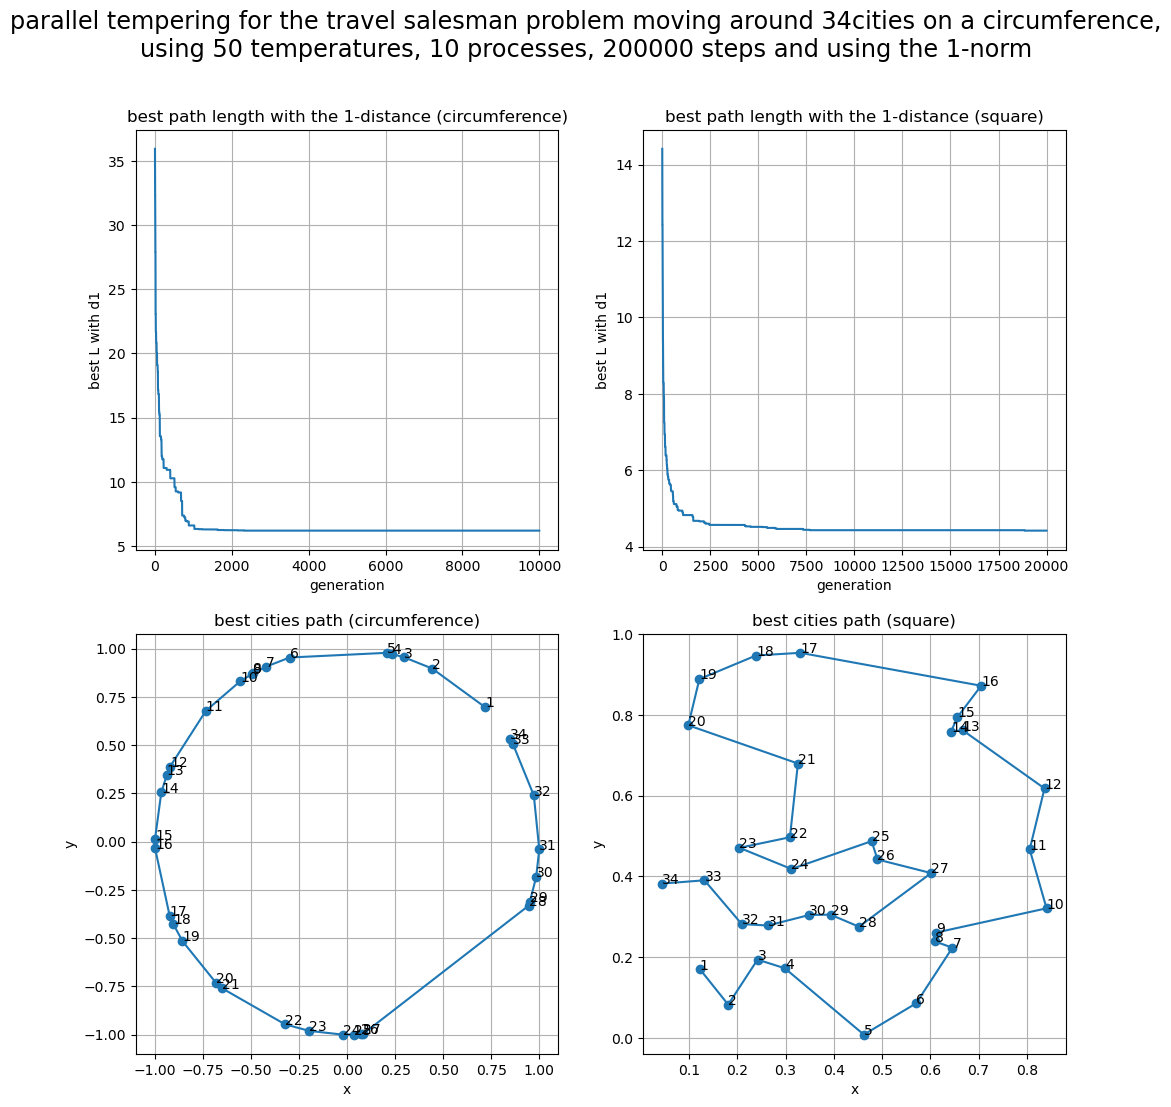

In [41]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

with open('./input.txt', 'r') as file:
    contents = file.readlines()
    
    n_cities      = int(contents[0])
    norm_power    = int(contents[1])
    restart       = int(contents[2])
    temp_min      = float(contents[3])
    temp_max      = float(contents[4])
    n_temp        = int(contents[5])
    config        = contents[6]
    nstep         = int(contents[7])

L1_best_circ = np.loadtxt("./best_path_circumference_1norm.txt")
L1_xy_circ   = np.loadtxt("./best_path_circumference_xy_1norm.txt")
L1_best_square = np.loadtxt("./best_path_square_1norm.txt")
L1_xy_square   = np.loadtxt("./best_path_square_xy_1norm.txt")

print("L_best=", L1_best_circ[-1, 1])
fig, ax = plt.subplots(2,2,figsize=(12, 12))

ax[0,0].plot(L1_best_circ[:,0], L1_best_circ[:,1])
ax[0,0].set_xlabel('generation')
ax[0,0].set_ylabel('best L with d1')
ax[0,0].set_title("best path length with the 1-distance (circumference)")
#ax[0,0].set_ylim(6,7)

ax[0,1].plot(L1_best_square[:,0], L1_best_square[:,1])
ax[0,1].set_xlabel('generation')
ax[0,1].set_ylabel('best L with d1')
ax[0,1].set_title("best path length with the 1-distance (square)")
#ax[0,1].set_ylim(4.25,4.5)

ax[1,0].plot(L1_xy_circ[:-1,1], L1_xy_circ[:-1,2], '-o')
ax[1,0].set_xlabel('x')
ax[1,0].set_ylabel('y')
ax[1,0].set_title("best cities path (circumference)")

ax[1,1].plot(L1_xy_square[:-1,1], L1_xy_square[:-1,2], '-o')
ax[1,1].set_xlabel('x')
ax[1,1].set_ylabel('y')
ax[1,1].set_title("best cities path (square)")

for i in range(n_cities):
    ax[1,0].text(L1_xy_circ[i, 1], L1_xy_circ[i, 2], str(i+1))
    ax[1,1].text(L1_xy_square[i, 1], L1_xy_square[i, 2], str(i+1))

for i in range(2):
    for j in range(2):
        ax[i,j].grid(True)
        
plt.suptitle("parallel tempering for the travel salesman problem moving around "+str(n_cities)+"cities on a circumference,\nusing "+str(n_temp)+" temperatures, 10 processes, "+str(nstep)+" steps and using the 1-norm", size='xx-large')
plt.show()

## Esercizio 10.2

L_best =  4.123944766985721


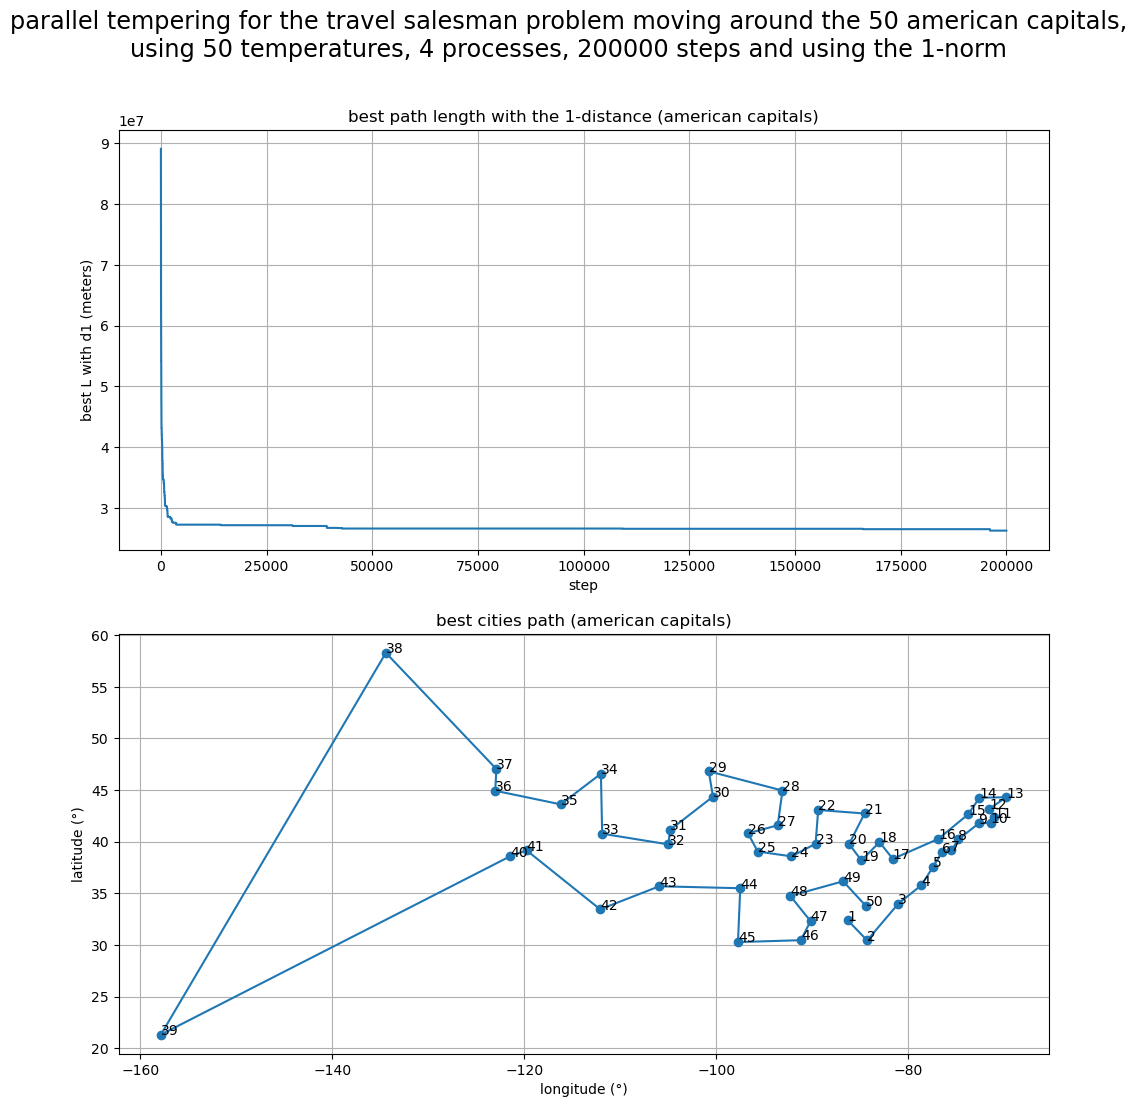

In [42]:
L1_best_ame = np.loadtxt("./best_path_american_capitals_1norm.txt")
L1_xy_ame   = np.loadtxt("./best_path_american_capitals_xy_1norm.txt") #angles in radians

R = 6373000
print("L_best = ",L1_best_ame[-1, 1]/R)

n_cities =50
phi = L1_xy_ame[:,1] #longitude
theta = L1_xy_ame[:,2] #latitude

phi = phi*180/np.pi# 0<phi<360
theta = theta*180/np.pi# 0<theta<90

phi = phi - 180 # -180<phi<180
theta = 90 - theta # theta=0 at equator and =90 at north pole

fig, ax = plt.subplots(2,1,figsize=(12, 12))

ax[0].plot(L1_best_ame[:,0], L1_best_ame[:,1])
ax[0].set_xlabel('step')
ax[0].set_ylabel('best L with d1 (meters)')
ax[0].set_title("best path length with the 1-distance (american capitals)")
#ax[0].set_ylim(26000000,30000000)

ax[1].plot(phi[:-1], theta[:-1], '-o')
ax[1].set_xlabel('longitude (°)')
ax[1].set_ylabel('latitude (°)')
ax[1].set_title("best cities path (american capitals)")

for i in range(n_cities):
    ax[1].text(phi[i], theta[i], str(i+1))

for i in range(2):
    ax[i].grid(True)
        
plt.suptitle("parallel tempering for the travel salesman problem moving around the 50 american capitals,\nusing "+str(n_temp)+" temperatures, 4 processes, "+str(nstep)+" steps and using the 1-norm", size='xx-large')
#plt.tight_layout()
plt.show()

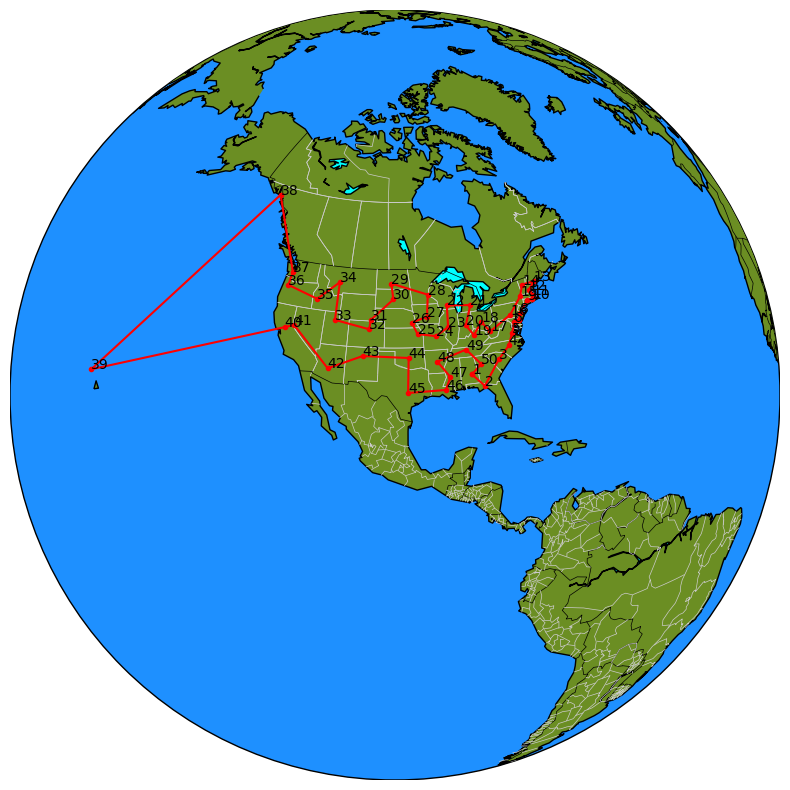

In [43]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))  # Imposta la dimensione della figura

#map = Basemap(projection='ortho', rsphere=100000, lat_0=30, lon_0=-110,
          #    llcrnrlat=0, urcrnrlat=60, llcrnrlon=-140, urcrnrlon=-60)  # Regola i limiti della mappa

map = Basemap(projection='ortho', lat_0=30, lon_0=-100,)

map.drawmapboundary(fill_color='dodgerblue')
map.fillcontinents(color='olivedrab',lake_color='aqua')
map.drawcoastlines()
map.drawcountries(color='0')
map.drawstates(color='0.8')

x, y = map(phi, theta)
for i in range(n_cities):
    plt.text(x[i], y[i], str(i+1))

map.plot(x, y, marker='.',color='r')

plt.show()

Qui riporto gli stessi grafici usando però l'algoritmo genetico dell'esercitazione 9

L_best =  4.491966107013965


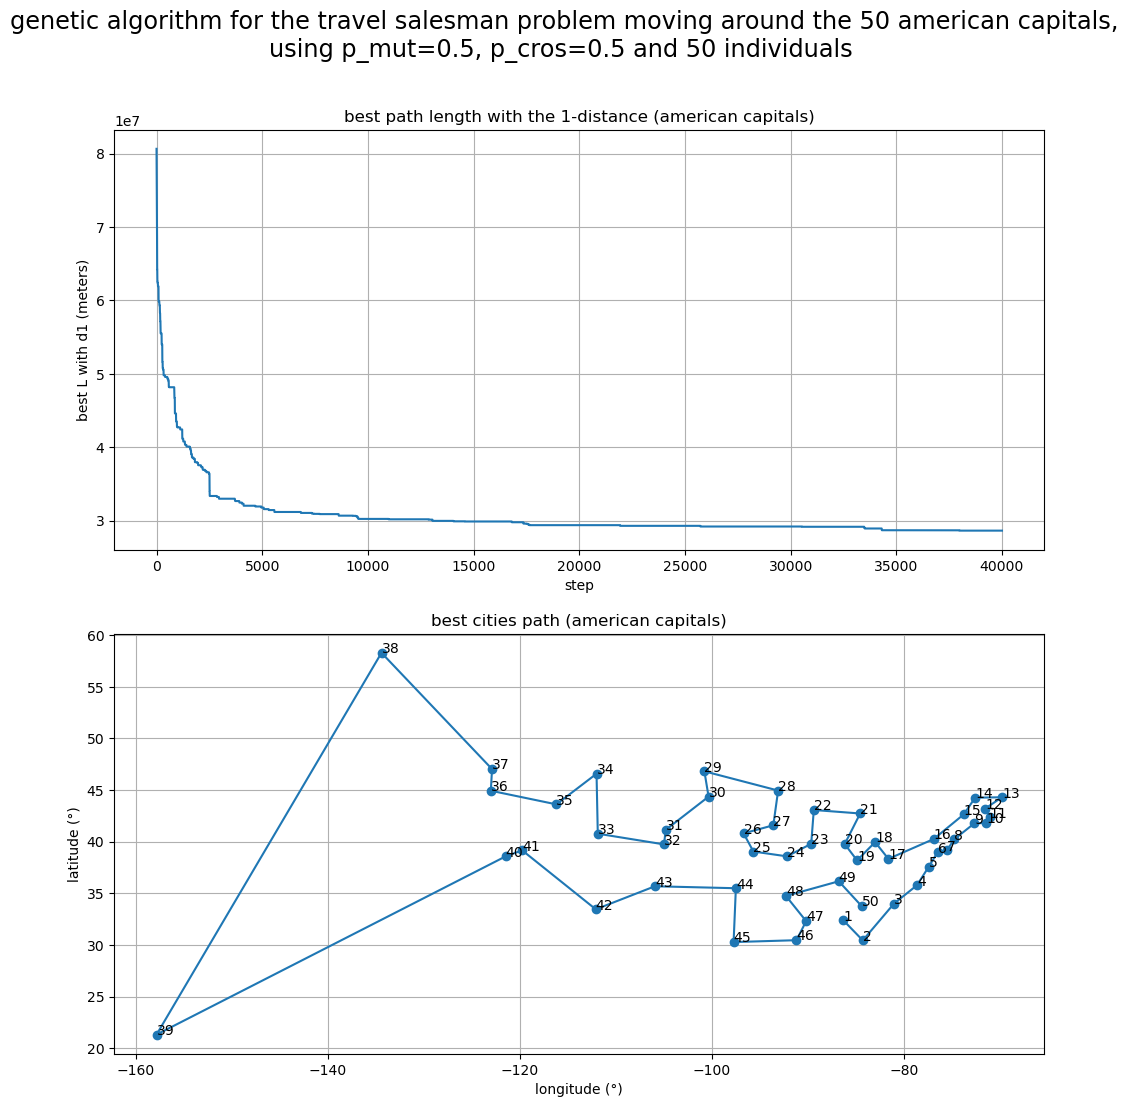

In [44]:
L1_best_ame_gen = np.loadtxt("./best_path_american_capitals_1norm_genetic.txt")
L1_xy_ame_gen   = np.loadtxt("./best_path_american_capitals_xy_1norm_genetic.txt") #angles in radians

print("L_best = ",L1_best_ame_gen[-1, 1]/R)

n_cities = 50
phi_gen = L1_xy_ame[:,1] #longitude
theta_gen = L1_xy_ame[:,2] #latitude

phi_gen = phi_gen*180/np.pi# 0<phi<360
theta_gen = theta_gen*180/np.pi# 0<theta<90

phi_gen = phi_gen - 180 # -180<phi<180
theta_gen = 90 - theta_gen # theta=0 at equator and =90 at north pole

fig, ax = plt.subplots(2,1,figsize=(12, 12))

ax[0].plot(L1_best_ame_gen[:,0], L1_best_ame_gen[:,1])
ax[0].set_xlabel('step')
ax[0].set_ylabel('best L with d1 (meters)')
ax[0].set_title("best path length with the 1-distance (american capitals)")
#ax[0].set_ylim(26000000,30000000)

ax[1].plot(phi_gen[:-1], theta_gen[:-1], '-o')
ax[1].set_xlabel('longitude (°)')
ax[1].set_ylabel('latitude (°)')
ax[1].set_title("best cities path (american capitals)")

for i in range(n_cities):
    ax[1].text(phi_gen[i], theta_gen[i], str(i+1))

for i in range(2):
    ax[i].grid(True)
        
plt.suptitle("genetic algorithm for the travel salesman problem moving around the 50 american capitals,\nusing p_mut=0.5, p_cros=0.5 and 50 individuals ", size='xx-large')
#plt.tight_layout() 
plt.show()

Con 200000 step montecarlo l'algoritmo di parallel tempering con 50 temperature e 10 core impiega 70 secondi.
L'algoritmo genetico dopo 40000 generazioni con probabilità di mutazione p_mut=0.1 e probabilità di crossing over p_cros = 0.7 trova la stessa soluzione nello stesso tempo.